# Von 32 auf 71 Jahre: Medizin, Gesellschaft und die Revolution der Lebenserwartung

Gruppe: Marija Trifunovic, Sophie von Felten und Lorna Skrnjug

Fragen:
- Wie haben sich die Unterschiede in der Lebenserwartung zwischen Ländern und Geschlechtern entwickelt - und warum?
- Inwiefern ist die Verringerung der Kindersterblichkeit der entscheidende Treiber für die Verdopplung der Lebenserwartung?







---




Datenquelle:

https://ourworldindata.org/life-expectancy?insight=women-tend-to-live-longer-than-men-but-this-gap-has-changed-over-time#key-insights




# Einleitung

Die Lebenserwartung hat sich in den letzten zwei Jahrhunderten weltweit mehr als verdoppelt. Während sie um 1900 noch bei etwa 32 Jahren lag, beträgt sie heute über 70 Jahre. Diese Entwicklung ist nicht gleichmäßig verlaufen: Unterschiede zwischen Ländern und Geschlechtern prägen das Bild. Frauen leben im Durchschnitt länger als Männer, doch die Größe dieser Differenz variiert über Zeit und Raum. Ein zentraler Treiber der steigenden Lebenserwartung ist der Rückgang der Kindersterblichkeit, der jedoch nicht allein verantwortlich ist. Ziel dieser Arbeit ist es, die Entwicklung der Unterschiede zwischen Ländern und Geschlechtern zu erklären und die Rolle der Kindersterblichkeit für die Verdopplung der Lebenserwartung zu analysieren.

In [9]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
# Lebenserwartung gesamt
url = "https://ourworldindata.org/grapher/life-expectancy.csv"

# Daten laden
df_1 = pd.read_csv(url)

df_1 = df_1.rename(columns= {"Period life expectancy at birth": "Life expectancy"})

# Erste Zeilen anzeigen
print(df_1.head())
print(df_1.columns)

        Entity Code  Year  Life expectancy
0  Afghanistan  AFG  1950          28.1563
1  Afghanistan  AFG  1951          28.5836
2  Afghanistan  AFG  1952          29.0138
3  Afghanistan  AFG  1953          29.4521
4  Afghanistan  AFG  1954          29.6975
Index(['Entity', 'Code', 'Year', 'Life expectancy'], dtype='object')


In [11]:
# Lebenserwartung gesamt
url = "life-expectation-at-birth-by-sex.csv"

# Daten laden
df_2 = pd.read_csv(url)

# Rename
df_2 = df_2.rename(columns= {"Period life expectancy - Sex: male - Age: 0": "male", "Period life expectancy - Sex: female - Age: 0": "female"})

# Erste Zeilen anzeigen
print(df_2.head())
print(df_2.columns)

        Entity Code  Year   female     male
0  Afghanistan  AFG  1950  28.8345  27.5467
1  Afghanistan  AFG  1951  29.2748  27.9711
2  Afghanistan  AFG  1952  29.7139  28.3940
3  Afghanistan  AFG  1953  30.1643  28.8222
4  Afghanistan  AFG  1954  30.3958  29.0786
Index(['Entity', 'Code', 'Year', 'female', 'male'], dtype='object')


In [12]:
# merge
df_1.set_index(['Entity', 'Year', "Code"],inplace=True)
df_2.set_index(['Entity', 'Year', "Code"],inplace=True)
df  = pd.concat([df_1, df_2], axis=1, join='inner', ignore_index=False).reset_index()
df

,Entity,Year,Code,Life expectancy,female,male
0,Afghanistan,1950,AFG,28.1563,28.8345,27.5467
1,Afghanistan,1951,AFG,28.5836,29.2748,27.9711
2,Afghanistan,1952,AFG,29.0138,29.7139,28.3940
3,Afghanistan,1953,AFG,29.4521,30.1643,28.8222
4,Afghanistan,1954,AFG,29.6975,30.3958,29.0786
...,...,...,...,...,...,...
20799,Zimbabwe,2019,ZWE,61.0603,63.0488,58.8296
20800,Zimbabwe,2020,ZWE,61.5300,63.7468,59.0906
20801,Zimbabwe,2021,ZWE,60.1347,62.2889,57.7174
20802,Zimbabwe,2022,ZWE,62.3601,64.5438,59.8805


In [148]:
df.loc[50:,] # kontrollieren

,Entity,Year,Code,Life expectancy,female,male
50,Afghanistan,2000,AFG,55.0047,56.5547,53.4627
51,Afghanistan,2001,AFG,55.5113,57.0889,53.9408
52,Afghanistan,2002,AFG,56.2251,57.4417,54.9858
53,Afghanistan,2003,AFG,57.1713,58.4724,55.8489
54,Afghanistan,2004,AFG,57.8098,59.0728,56.5190
...,...,...,...,...,...,...
20799,Zimbabwe,2019,ZWE,61.0603,63.0488,58.8296
20800,Zimbabwe,2020,ZWE,61.5300,63.7468,59.0906
20801,Zimbabwe,2021,ZWE,60.1347,62.2889,57.7174
20802,Zimbabwe,2022,ZWE,62.3601,64.5438,59.8805


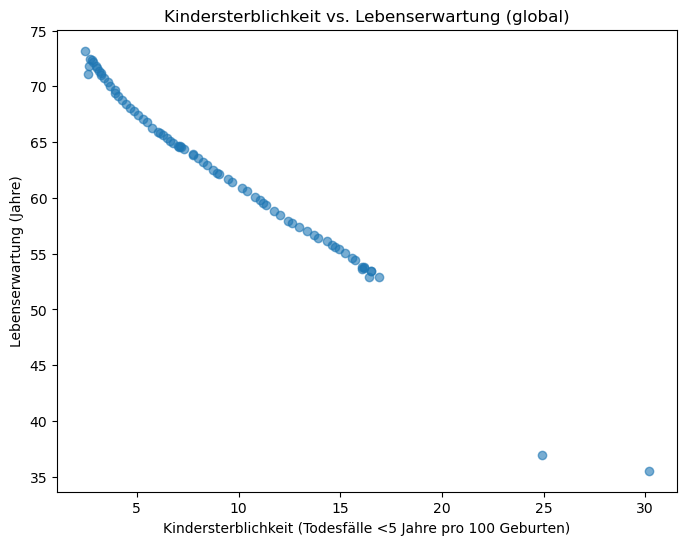

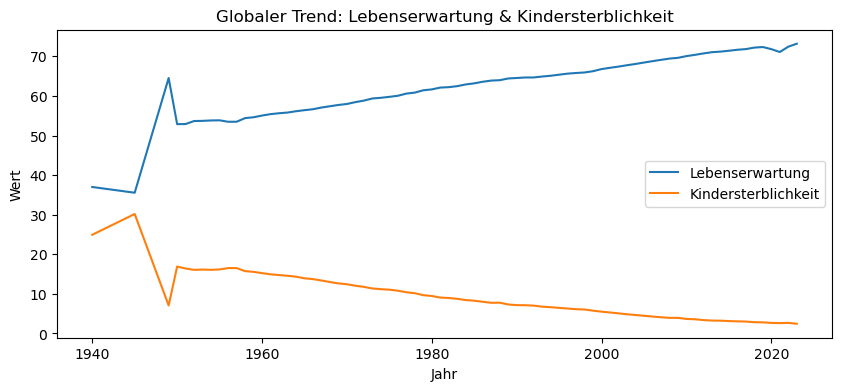

Korrelation zwischen Lebenserwartung und Kindersterblichkeit: -0.994
Lebenserwartung 1950: 52.9 Jahre, 2023: 73.2 Jahre
Kindersterblichkeit 1950: 16.9, 2023: 2.5


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1) Daten einlesen
df_life = pd.read_csv("life-expectancy.csv")  # Lebenserwartung
df_child = pd.read_csv("under-5-mortality-rate-sdgs.csv")  # Kindersterblichkeit

# 2) Spalten bereinigen
df_life.columns = df_life.columns.str.strip()
df_child.columns = df_child.columns.str.strip()

# 3) Wichtige Spalten behalten
df_life = df_life[["Entity", "Year", "Period life expectancy at birth"]]
df_child = df_child[["Entity", "Year", "Child mortality rate of children aged under five years, per 100 live births"]]

# Rename columns for easier handling
df_life = df_life.rename(columns={"Period life expectancy at birth": "life_expectancy_at_birth"})
df_child = df_child.rename(columns={"Child mortality rate of children aged under five years, per 100 live births": "child_mortality_rate"})

# 4) Daten zusammenführen (gemeinsame Länder + Jahre)
df_merged = pd.merge(df_life, df_child, on=["Entity", "Year"], how="inner")

# 5) Globaler Durchschnitt pro Jahr
global_trend = (
    df_merged.groupby("Year")
    .agg({"life_expectancy_at_birth": "mean",
          "child_mortality_rate": "mean"})
    .reset_index()
)

# 6) Scatterplot: Kindersterblichkeit vs. Lebenserwartung
plt.figure(figsize=(8, 6))
plt.scatter(
    global_trend["child_mortality_rate"],
    global_trend["life_expectancy_at_birth"],
    alpha=0.6
)
plt.title("Kindersterblichkeit vs. Lebenserwartung (global)")
plt.xlabel("Kindersterblichkeit (Todesfälle <5 Jahre pro 100 Geburten)")
plt.ylabel("Lebenserwartung (Jahre)")
plt.show()

# 7) Zeitreihen-Plot: Lebenserwartung und Kindersterblichkeit
plt.figure(figsize=(10, 4))
plt.plot(global_trend["Year"], global_trend["life_expectancy_at_birth"], label="Lebenserwartung")
plt.plot(global_trend["Year"], global_trend["child_mortality_rate"], label="Kindersterblichkeit")
plt.title("Globaler Trend: Lebenserwartung & Kindersterblichkeit")
plt.xlabel("Jahr")
plt.ylabel("Wert")
plt.legend()
plt.show()

# 8) Korrelation berechnen
corr = global_trend["life_expectancy_at_birth"].corr(global_trend["child_mortality_rate"])
print(f"Korrelation zwischen Lebenserwartung und Kindersterblichkeit: {corr:.3f}")

# 9) Prozentuale Veränderung von 1950 bis heute (als Maß für Verdopplung)
start_year = 1950
end_year = global_trend["Year"].max()

life_start = global_trend.loc[global_trend["Year"] == start_year, "life_expectancy_at_birth"].values[0]
life_end = global_trend.loc[global_trend["Year"] == end_year, "life_expectancy_at_birth"].values[0]

child_start = global_trend.loc[global_trend["Year"] == start_year, "child_mortality_rate"].values[0]
child_end = global_trend.loc[global_trend["Year"] == end_year, "child_mortality_rate"].values[0]

print(f"Lebenserwartung {start_year}: {life_start:.1f} Jahre, {end_year}: {life_end:.1f} Jahre")
print(f"Kindersterblichkeit {start_year}: {child_start:.1f}, {end_year}: {child_end:.1f}")


Kindersterblichkeit vs Lebenserwartung

bei einem Rückgang der Kindersterblichkeit von ca. 30 auf unter 5 Todesfälle pro 100 Geburten
die Lebenserwartung von ca. 35 auf über 70 Jahre steigt
Das entspricht nahezu einer Verdopplung der Lebenserwartung
Der Graph zeigt einen starken negativen Zusammenhang zwischen Kindersterblichkeit und Lebenserwartung. Besonders der starke Rückgang der Kindersterblichkeit im 20. Jahrhundert geht mit einem massiven Anstieg der Lebenserwartung einher, der nahezu einer Verdopplung entspricht. Dies legt nahe, dass die Verringerung der Kindersterblichkeit ein entscheidender Treiber für den historischen Anstieg der Lebenserwartung war. Allerdings kann der Graph allein nicht erklären, warum die Lebenserwartung auch in Zeiten niedriger Kindersterblichkeit weiter steigt, was auf zusätzliche Fortschritte in Medizin und Lebensstandard hinweist.

## 2. Daten vorbereiten 

## Format des Datensatzes:
Typisch Long-Format: Spalten wie country, year, sex, life expectancy.

Jede Zeile = eine Beobachtung für ein Land, Jahr und Geschlecht.

Kolumnenstruktur:
-country → String (Name des Landes)
-year → Integer (Jahreszahl)
-sex → String (male/female)
-life_expectancy → Float (Jahre)

## Pivot/Wide-Format 

Long-Format: Für Zeitreihenanalysen, Vergleiche über Länder und Geschlechter.

Wide-Format (Pivot): (Life expectancy_male, Life expectancy_female) 

Datentypen im Datensatz:
-string (Länder, Geschlecht)
-int (Jahr)
-float (Lebenserwartung)

Zusammenfassend: 
Der verwendete Datensatz liegt im Long Format vor und besteht aus Beobachtungen zur Lebenserwartung bei Geburt für verschiedene Länder über mehrere Jahre. Die Daten umfassen kategoriale Variablen (Land, Ländercode), eine diskrete Zeitvariable (Jahr) sowie eine kontinuierliche Messvariable (Lebenserwartung). Für Zeitreihen- und Trendanalysen wird das Long Format verwendet, während für Gruppenvergleiche und die Berechnung von Differenzen eine Pivotierung in ein Wide Format sinnvoll ist.


In [13]:
df[df['Year'] >= 2000]

,Entity,Year,Code,Life expectancy,female,male
50,Afghanistan,2000,AFG,55.0047,56.5547,53.4627
51,Afghanistan,2001,AFG,55.5113,57.0889,53.9408
52,Afghanistan,2002,AFG,56.2251,57.4417,54.9858
53,Afghanistan,2003,AFG,57.1713,58.4724,55.8489
54,Afghanistan,2004,AFG,57.8098,59.0728,56.5190
...,...,...,...,...,...,...
20799,Zimbabwe,2019,ZWE,61.0603,63.0488,58.8296
20800,Zimbabwe,2020,ZWE,61.5300,63.7468,59.0906
20801,Zimbabwe,2021,ZWE,60.1347,62.2889,57.7174
20802,Zimbabwe,2022,ZWE,62.3601,64.5438,59.8805


In [14]:
# Spaltennamen
print("Spalten:", df.columns.tolist())

# Datentypen
print(df.dtypes)

# Anzahl Länder und Jahre
print("Anzahl Länder:", df["Entity"].nunique())
print("Zeitraum:", df["Year"].min(), "-", df["Year"].max())

Spalten: ['Entity', 'Year', 'Code', 'Life expectancy', 'female', 'male']
Entity              object
Year                 int64
Code                object
Life expectancy    float64
female             float64
male               float64
dtype: object
Anzahl Länder: 264
Zeitraum: 1751 - 2023


In [15]:
print("\n------ HEAD ------")
print(df.head())

print("\n------ DATENTYPEN ------")
print(df.dtypes)


------ HEAD ------
        Entity  Year Code  Life expectancy   female     male
0  Afghanistan  1950  AFG          28.1563  28.8345  27.5467
1  Afghanistan  1951  AFG          28.5836  29.2748  27.9711
2  Afghanistan  1952  AFG          29.0138  29.7139  28.3940
3  Afghanistan  1953  AFG          29.4521  30.1643  28.8222
4  Afghanistan  1954  AFG          29.6975  30.3958  29.0786

------ DATENTYPEN ------
Entity              object
Year                 int64
Code                object
Life expectancy    float64
female             float64
male               float64
dtype: object


In [16]:
# 4. GESCHLECHTERUNTERSCHIED ANALYSIEREN

# Reset index to make Entity, Year, Code regular columns
df_reset = df.reset_index() if df.index.name else df.copy()

# Calculate sex gap
df_reset["sex_gap"] = df_reset["female"] - df_reset["male"]

print("\n------ GRÖSSTE GESCHLECHTERUNTERSCHIEDE ------")
print(df_reset.sort_values("sex_gap", ascending=False).head())

print("\n------ DURCHSCHNITTLICHER UNTERSCHIED ------")
print(f"Durchschnittlicher Gap: {df_reset['sex_gap'].mean():.2f} Jahre")



------ GRÖSSTE GESCHLECHTERUNTERSCHIEDE ------
                      Entity  Year Code  Life expectancy   female     male  \
4262                  Cyprus  1974  CYP          54.5513  70.7944  44.1738   
6187                  France  1915  FRA          36.5500  52.7300  27.2800   
6186                  France  1914  FRA          38.2300  53.2900  29.3700   
6005                 Finland  1941  FIN          46.4200  60.6600  37.0400   
2325  Bosnia and Herzegovina  1993  BIH          50.8941  64.5224  41.8783   

      sex_gap  
4262  26.6206  
6187  25.4500  
6186  23.9200  
6005  23.6200  
2325  22.6441  

------ DURCHSCHNITTLICHER UNTERSCHIED ------
Durchschnittlicher Gap: 4.89 Jahre


## 3. Statistik der Rohdaten (Analyse im Long-Format)

1.	Die Variable Lebenserwartung bei Geburt ist eine kontinuierliche Variable, da sie gemessene Werte mit Dezimalstellen annehmen kann.
2.	Insgesamt stehen für die untersuchte Variable 19 560 Datenpunkte zur Verfügung.
3.	Die Verteilung der Lebenserwartung zeigt eine Konzentration der Werte zwischen 60 und 80 Jahren. Die Verteilung ist leicht linksschief, da einige Länder deutlich niedrigere Lebenserwartungen aufweisen. Einzelne Ausreisser sind insbesondere im unteren Wertebereich erkennbar.

Zusammenfassend: 
Die Rohdatenanalyse ist ein vorbereitender Schritt und bildet die methodische Grundlage für die anschliessende Beantwortung unserer Fragestellungen. Die untersuchte Variable Lebenserwartung bei Geburt ist kontinuierlich. Es stehen insgesamt 19 560 gültige Datenpunkte zur Verfügung, ohne fehlende Werte. Die Verteilung zeigt eine Häufung der Werte im Bereich von 60 bis 80 Jahren und weist eine leichte Linksschiefe auf. Zur Darstellung der Verteilung wurden ein Histogramm und ein Boxplot verwendet.


In [17]:
url_le_total = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Life%20expectancy%20at%20birth%20(total)%20-%20Clio-Infra/Life%20expectancy%20at%20birth%20(total)%20-%20Clio-Infra.csv"

url_le_female = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Life%20expectancy%20at%20birth%20(female)%20-%20Clio-Infra/Life%20expectancy%20at%20birth%20(female)%20-%20Clio-Infra.csv"

url_le_male = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Life%20expectancy%20at%20birth%20(male)%20-%20Clio-Infra/Life%20expectancy%20at%20birth%20(male)%20-%20Clio-Infra.csv"

url_u5 = "https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Child%20mortality%20under%205%20-%20Clio-Infra/Child%20mortality%20under%205%20-%20Clio-Infra.csv"


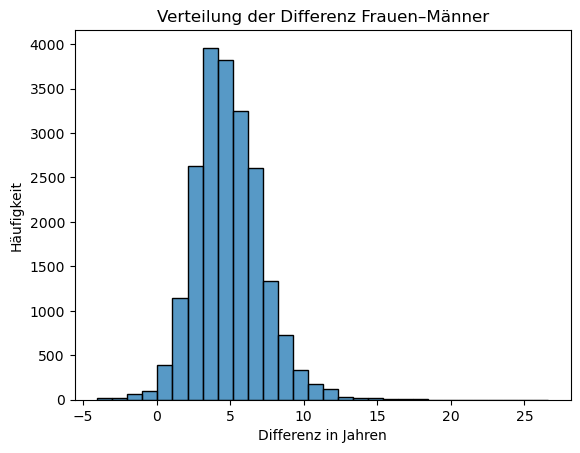

In [18]:
# Histogramm der Differenzen
sns.histplot(df_reset['sex_gap'], bins=30)
plt.title("Verteilung der Differenz Frauen–Männer")
plt.xlabel("Differenz in Jahren")
plt.ylabel("Häufigkeit")
plt.show()


# 4. Analyse

In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

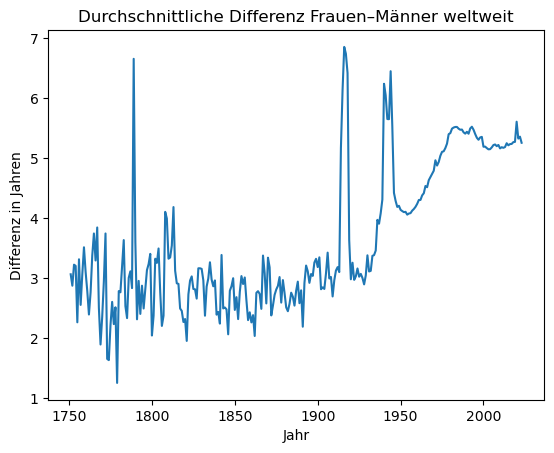

In [20]:
trend = df_reset.groupby("Year")["sex_gap"].mean()
trend.plot()
plt.title("Durchschnittliche Differenz Frauen–Männer weltweit")
plt.ylabel("Differenz in Jahren")
plt.xlabel("Jahr")
plt.show()

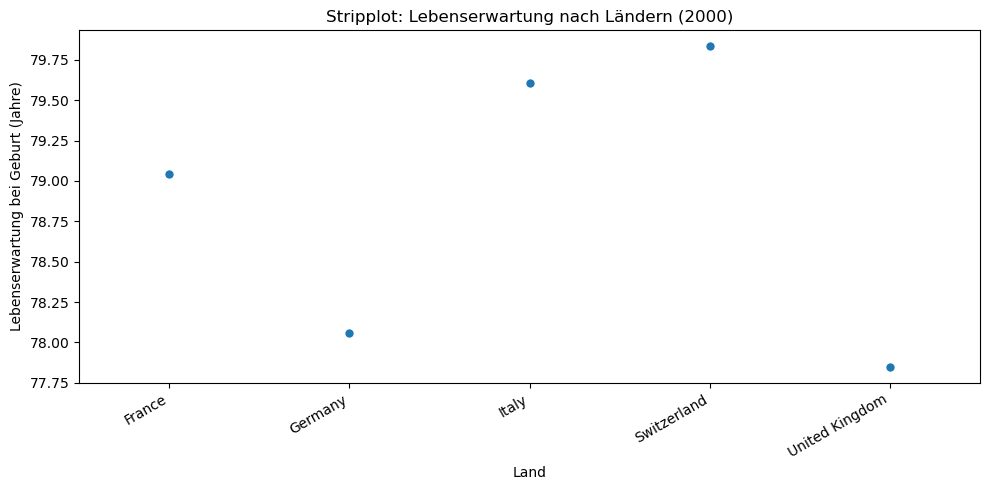

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) CSV einlesen (Pfad anpassen)
df = pd.read_csv("life-expectancy.csv")

# 2) Spaltennamen (aus eurem Datensatz)
value_col = "Period life expectancy at birth"

# 3) Auswahl: Jahr + Länder (anpassen!)
year = 2000
countries = ["Switzerland", "Germany", "France", "Italy", "United Kingdom"]

# 4) Filtern
dff = df[(df["Year"] == year) & (df["Entity"].isin(countries))].copy()

# 5) Plot
plt.figure(figsize=(10, 5))
sns.stripplot(
    data=dff,
    x="Entity",
    y=value_col,
    jitter=0.25,     # Punkte leicht "streuen", damit man sie besser sieht
    size=6
)
plt.title(f"Stripplot: Lebenserwartung nach Ländern ({year})")
plt.xlabel("Land")
plt.ylabel("Lebenserwartung bei Geburt (Jahre)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


C:\Users\matri\AppData\Local\Temp\ipykernel_31256\2181911501.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mean_sex_diff", y="Entity", data=top10, palette="viridis")


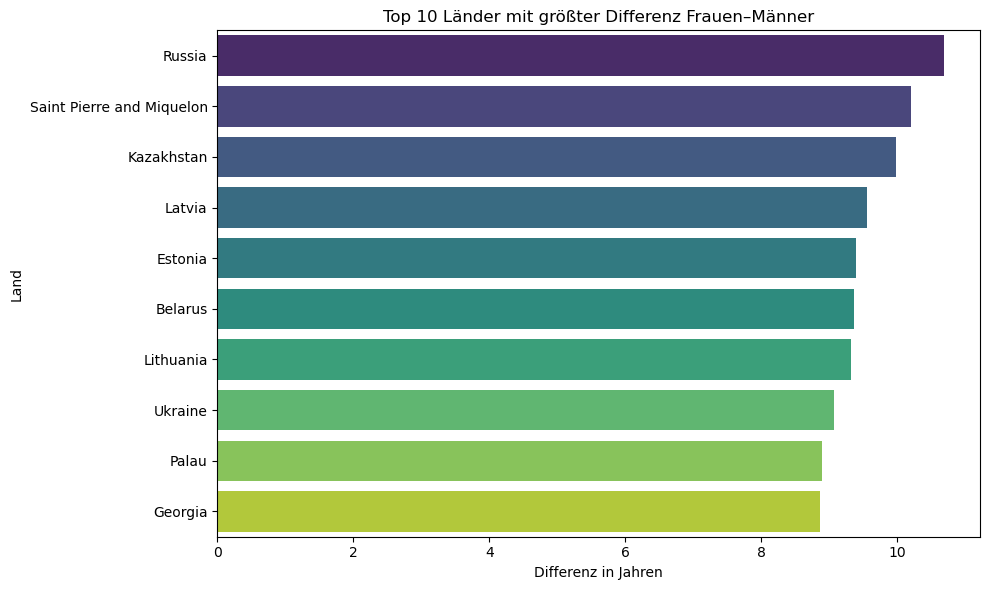

In [23]:
# Calculate sex difference per country
df_reset['sex_diff'] = df_reset['female'] - df_reset['male']

# Get mean sex difference per country
country_mean = df_reset.groupby('Entity')['sex_diff'].mean().reset_index()
country_mean.columns = ['Entity', 'mean_sex_diff']

# Sort and get top 10 countries with largest difference
top10 = country_mean.sort_values(by="mean_sex_diff", ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="mean_sex_diff", y="Entity", data=top10, palette="viridis")
plt.title("Top 10 Länder mit größter Differenz Frauen–Männer")
plt.xlabel("Differenz in Jahren")
plt.ylabel("Land")
plt.tight_layout()
plt.show()

### Erklärung zur Graphik Top 10 Länder mit grösster Differenz Frauen-Männer

Die Graphik zeigt die Unterschiede in der Lebenserwartung zwischen Frauen und Männern in den zehn Ländern mit der größten geschlechtsspezifischen Lücke.

Was wird dargestellt?
X-Achse: Differenz in Jahren – also wie viele Jahre Frauen im Durchschnitt länger leben als Männer.

Y-Achse: die zehn Länder mit der größten Differenz.

Farbverlauf: Visualisiert die Stärke der Differenz – je dunkler, desto größer die Lücke.

Interpretation der Daten
- Russland liegt mit über 10 Jahren Unterschied an der Spitze. Das bedeutet, russische Frauen leben im Schnitt mehr als ein Jahrzehnt länger als Männer.

- Saint Pierre und Miquelon, Kasachstan, Lettland, Estland und andere osteuropäische Länder folgen mit Differenzen zwischen etwa 9 und 10 Jahren.

- Georgien bildet das Schlusslicht der Top 10 mit knapp unter 9 Jahren Unterschied.

Die große Differenz in diesen Ländern kann auf mehrere Faktoren zurückgeführt werden:
Höhere Sterblichkeit bei Männern durch riskanteres Verhalten, Alkoholmissbrauch, Arbeitsunfälle oder Gewalt.
Gesundheitssysteme, die möglicherweise Frauen besser erreichen oder versorgen.
Soziale und kulturelle Rollenbilder, die Männer stärker belasten oder weniger gesundheitsbewusst machen

### Spezifische Untersuchung der Fragestellung (Berechnungen)

Zur Untersuchung dieser Fragestellung wurden zwei Datensätze von Our World in Data verwendet:

- durchschnittliche Lebenserwartung bei Geburt
- Kindersterblichkeit (unter 5 Jahren)

Zur spezifischen Untersuchung der Fragestellung wurden die Rohdaten zur Lebenserwartung rechnerisch ausgewertet. Zunächst haben wir die Differenz der Lebenserwartung zwischen Frauen und Männern betrachtet und für jedes Jahr der globale Durchschnitt dieser Differenz berechnet. Dazu wurden die Daten nach dem Jahr gruppiert und der Mittelwert der geschlechtsspezifischen Differenz pro Jahr bestimmt. Diese Berechnung erlaubt es, zeitliche Veränderungen der durchschnittlichen Lebenserwartungsdifferenz zwischen Frauen und Männern weltweit zu analysieren.
Zusätzlich wurde für ein ausgewähltes Referenzjahr (2000) ein Ländervergleich durchgeführt. Hierfür wurden mehrere europäische Länder (Schweiz, Deutschland, Frankreich, Italien und Vereinigtes Königreich) gefiltert und deren jeweilige Lebenserwartung bei Geburt extrahiert. Die Berechnung basiert auf den konkreten Messwerten der Lebenserwartung pro Land und Jahr und ermöglicht einen direkten quantitativen Vergleich zwischen den ausgewählten Ländern.
Durch diese Berechnungen werden sowohl zeitliche Trends (globale Entwicklung der Geschlechterdifferenz) als auch räumliche Unterschiede (Vergleich zwischen Ländern in einem festen Jahr) sichtbar gemacht und bilden die Grundlage für die anschliessende Visualisierung und Interpretation der Ergebnisse.
Die Daten wurden nach Jahr zusammengeführt und zu globalen Durchschnittswerten aggregiert. Anschließend wurden
Zeitreihen der Lebenserwartung und Kindersterblichkeit berechnet, der Zusammenhang zwischen beiden Größen mittels Scatterplot visualisiert und die Korrelation zwischen Kindersterblichkeit und Lebenserwartung bestimmt



### Visualisieren der Resultate: 
Für die zeitliche Entwicklung der durchschnittlichen Differenz der Lebenserwartung zwischen Frauen und Männern wurde ein Liniendiagramm verwendet. Diese Darstellungsform ist besonders geeignet, um Trends und Veränderungen über einen längeren Zeitraum darzustellen. Die x-Achse zeigt das Jahr, während die y-Achse die durchschnittliche Differenz der Lebenserwartung in Jahren angibt. Durch eine klare Achsenbeschriftung und einen aussagekräftigen Titel wird die zeitliche Entwicklung übersichtlich und gut interpretierbar dargestellt.
Für den Vergleich der Lebenserwartung zwischen einzelnen Ländern in einem festen Referenzjahr (2000) wurde ein Stripplot verwendet. Diese Darstellungsform eignet sich, um einzelne Messwerte pro Kategorie (Land) direkt miteinander zu vergleichen. Die x-Achse stellt die Länder dar, die y-Achse die Lebenserwartung bei Geburt in Jahren. Der Plot erlaubt einen direkten visuellen Vergleich der Länder und macht Unterschiede in der Lebenserwartung deutlich sichtbar.
Andere Darstellungsformen wie Kuchendiagramme oder Säulendiagramme wurden nicht gewählt, da sie für zeitliche Verläufe oder den Vergleich einzelner kontinuierlicher Messwerte weniger geeignet sind. Eine zweite y-Achse war ebenfalls nicht notwendig, da jeweils nur eine abhängige Variable dargestellt wurde.

Aus den Visualisierungen haben wir folgende Beobachtungen gemacht:
Die globale Lebenserwartung steigt von etwa 35 Jahren auf über 70 Jahre, was nahezu einer Verdopplung entspricht.
Gleichzeitig sinkt die Kindersterblichkeit drastisch von über 30 Todesfällen pro 100 Geburten auf unter 5.
Im Scatterplot zeigt sich ein starker negativer Zusammenhang:
Je niedriger die Kindersterblichkeit, desto höher die Lebenserwartung.
Die Datenpunkte liegen nahezu auf einer Linie, was auf einen sehr starken Zusammenhang hindeutet.
In späteren Jahren steigt die Lebenserwartung weiter, obwohl die Kindersterblichkeit bereits sehr niedrig ist.

### Interpretation der Resultate (Hypothesen)

Die Resultate sprechen dafür, dass die Verringerung der Kindersterblichkeit ein entscheidender Treiber für den historischen Anstieg der Lebenserwartung war:
Hohe Kindersterblichkeit senkt die durchschnittliche Lebenserwartung stark, da viele Menschen bereits in sehr jungen Jahren sterben. Der starke Rückgang der Kindersterblichkeit im 20. Jahrhundert führte daher zu einem besonders großen Anstieg der durchschnittlichen Lebenserwartung.
Die nahezu lineare Beziehung im Scatterplot unterstützt die Hypothese, dass dieser Faktor eine zentrale Rolle gespielt hat.
Gleichzeitig deuten die Daten darauf hin, dass Kindersterblichkeit nicht der einzige Einflussfaktor ist:
Auch bei bereits niedriger Kindersterblichkeit steigt die Lebenserwartung weiter. Dies spricht für zusätzliche Faktoren wie medizinischen Fortschritt, bessere Hygiene, Impfungen und verbesserte Lebensbedingungen im Erwachsenenalter.

### Untermauerung durch Literatur (Zusammenhänge)

Die Interpretation wird durch die Fachliteratur von Our World in Data gestützt:
Our World in Data zeigt, dass der historische Anstieg der Lebenserwartung zunächst vor allem durch den Rückgang der Kindersterblichkeit erklärt werden kann.
Verbesserungen in Hygiene, sauberem Trinkwasser, Ernährung und Impfprogrammen reduzierten frühzeitige Todesfälle massiv.
In neueren Jahrzehnten tragen zusätzlich medizinische Fortschritte bei Erwachsenen und älteren Menschen zur weiteren Steigerung der Lebenserwartung bei.
Damit bestätigen sowohl die Datenanalyse als auch die Literatur, dass die Verringerung der Kindersterblichkeit der wichtigste, aber nicht alleinige Treiber für die Verdopplung der Lebenserwartung war.
